# Identification of breast cancer from histopathological images using Image Classification

# GROUP MEMBERS

1. Andrew Mutuku
2. Amina Saidi
3. Joseph Karumba
4. Wambui Githinji
5. Winnie Osolo
6. Margaret Njenga


## Background

Breast cancer originates in the breast tissue, where abnormal cells grow uncontrollably to form tumors. If untreated, these tumors can spread and become fatal. This cancer can affect both men and women, though it is more common in women, typically starting in the lobules, ducts, or connective tissue. When the cancer spreads outside the breast, it is termed metastatic.

Breast cancer is the most commonly diagnosed cancer worldwide, with 2.26 million cases recorded in 2020, and is the leading cause of cancer mortality among females. Historically more prevalent in developed countries, over half of diagnoses and two-thirds of deaths now occur in less developed regions due to population aging and the adoption of high-risk lifestyles in low- and middle-income countries (LMICs).

In LMICs, such as many sub-Saharan African countries, breast cancer has a higher mortality rate due to late-stage presentation, limited healthcare infrastructure, high costs, unavailability of cancer services, and low patient awareness. In Kenya, breast cancer accounts for 16.1% of all cancers, with 6,799 new cases diagnosed in 2020, up from 5,985 in 2018. Deaths also increased from 2,553 in 2018 to 3,107 in 2020, making it the second-leading cause of cancer deaths. The disease predominantly affects women aged 35 to 45, with 68% of cases diagnosed at late stages, resulting in low survival rates.

Early detection and timely treatment significantly improve survival rates. However, most patients in Kenya present with advanced disease, highlighting the need for better screening programs. Traditional diagnostic methods involve manual examination of histopathological images by pathologists, which is time-consuming, prone to human error, and limited by the availability of specialized professionals.

Leveraging machine learning for classifying histopathological images can enhance diagnostic accuracy, reduce the workload of medical professionals, and improve patient outcomes by enabling earlier and more accurate detection of breast cancer. Adopting advanced technologies in healthcare systems in Kenya and other LMICs can significantly improve breast cancer diagnosis and treatment, ultimately saving more lives. The integration of machine learning in medical diagnostics represents a promising advancement to address the challenges faced by healthcare providers in these regions.

## Study questions

1. How accurately can machine learning models classify benign and malignant breast tumor histopathological images?
2. Which machine learning algorithms yield the highest accuracy in classifying breast cancer images?
3. What are the key challenges in using machine learning for breast cancer histopathological image classification?
4. How can machine learning improve the diagnostic process for breast cancer in low- and middle-income countries?

## Primary objectives

1.	Develop a Robust Image Classification Model
Create a machine learning model capable of accurately distinguishing between benign and malignant breast tumor histopathological images.
2.	Enhance Diagnostic Accuracy
Improve the accuracy of breast cancer diagnoses through automated analysis, reducing the rate of false positives and negatives.

## Secondary objectives

1.	Evaluate Machine Learning Algorithms
Compare the performance of various machine learning algorithms (e.g., Convolutional Neural Networks, Support Vector Machines) to identify which yields the highest accuracy in classifying breast cancer images.
2.	Improve Early Detection Rates
Facilitate earlier detection of breast cancer by providing a reliable tool for regular screening, leading to better patient outcomes.
3.	Develop a Cost-Effective Diagnostic Tool
Create an affordable and accessible diagnostic tool that can be used in resource-limited settings, contributing to healthcare equity.

## Data understanding
We sourced our data from the Breast Cancer Histopathological Image Classification (BreakHis) database, which contains 9,104 microscopic images of breast tumor tissue, including 2,480 benign and 5,429 malignant samples. In the Kenyan Context, most machines used in cancer detection are light microscopes which can focus images at either 40X magnification or 100X magnification. We opted top focus on these magnification inour model. Each image file name stores essential information such as the method of procedure biopsy, tumor class (benign or malignant), tumor type, patient identification, and magnification factor. This dataset, developed in collaboration with the P&D Laboratory in Parana, Brazil, provides a valuable tool for benchmarking and evaluating breast cancer image classification models.

## Data preparation

1.	Data Cleaning and Preprocessing:

•	Image Normalization: Converting all images to a standard size and resolution to ensure uniformity improving model performance
•	Data Augmentation: Applying techniques such as rotation, flipping, scaling, and cropping to artificially increase the size of the dataset.
•	Handling Missing or Corrupted Data: Identify and handle any corrupted or incomplete image files. Images with errors will be removed or repaired if possible.
•	Ensure Accurate Labels: Double-check that all annotations (benign or malignant) are accurate and consistently applied

2.	Data Splitting:

•	Training, Validation, and Test Sets: Divide the dataset into training, validation, and test sets ensuring that the distribution of benign and malignant samples is balanced across these sets to avoid bias.

**Modelling**

For this project, we will test a variety of models to identify the best approach for classifying breast cancer histopathological images. We will use Convolutional Neural Networks (CNNs) and explore Support Vector Machines (SVMs), as well as classical machine learning models like K-Nearest Neighbors (KNN) and Random Forests. Additionally, we will consider Gradient Boosting Machines such as XGBoost or LightGBM.
In the training procedure, we will train the selected models using the training dataset while monitoring their progress through loss and accuracy metrics to ensure effective learning. Model performance will be evaluated on the validation set to fine-tune hyperparameters and prevent overfitting, using metrics such as accuracy, precision, recall, and F1-score. We will also implement k-fold cross-validation to ensure consistent performance across different subsets of the data, aiding in better generalization to unseen data.
To prevent overfitting and enhance generalization, we will apply regularization techniques such as dropout, L2 regularization, and data augmentation. Furthermore, grid search or random search will be utilized to optimize hyperparameters, including learning rates, batch sizes, and network architectures, to identify the best configuration for our models.

## Evaluation

1.	Performance metrics

•	Accuracy: Measure the overall percentage of correctly classified images.
•	Precision and Recall: Calculate precision (the ratio of true positives to the sum of true and false positives) and recall (the ratio of true positives to the sum of true positives and false negatives) to assess the model’s ability to correctly identify benign and malignant tumors.
•	F1-Score: Compute the F1-score to balance the trade-off between false positives and false negatives.
•	Confusion Matrix: Analyze the confusion matrix to visualize the classification performance and identify types of errors

2.	Model comparison

* Compare the performance of different machine learning algorithms using evaluation metrics.
* Determine which algorithm provides the highest accuracy and best generalization on the test dataset.
Deployment

**Results reporting**

•	Provide a detailed report and presentations showcasing model architecture, performance and potential impact.

•	Measure the time required for the model to make predictions on new images to ensure it meets the operational requirements.

## A. DATA LOADING

In [3]:
# Importing all necessary libraries

import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import cv2
import imghdr
import zipfile
import os
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.manifold import MDS
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances
import torch.nn as nn

from sklearn.decomposition import PCA
import shutil
import random


from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
from PIL import Image
import io

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [4]:
# Mounting the drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
! pip install Pillow

In [6]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

gpus

# This code configures TensorFlow to use GPU devices efficiently by enabling dynamic memory allocation,
# preventing it from allocating all GPU memory at once.

[]

In [7]:
# Install p7zip
!apt-get install -y p7zip-full

# Extract using p7zip
!7z x /content/drive/MyDrive/BREAST\ CANCER.zip -o/content/drive/MyDrive/extracted_breast_cancer


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-8).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.

7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/drive/MyDrive/                                 1 file, 1138684463 bytes (1086 MiB)

Extracting archive: /content/drive/MyDrive/BREAST CANCER.zip
 99% 4096 Open              --
Path = /content/drive/MyDrive/BREAST CANCER.zip
Type = zip
Physical Size = 1138684463

  0%    
Would you like to replace the existing file:
  Path:     /content/drive/MyDrive/extracted_breast_cancer/BREAST CANCER/.DS_Store
  Size:     6148 bytes (7 KiB)

In [8]:
# Path to the extracted "breast cancer" folder
main_directory = '/content/drive/MyDrive/extracted_breast_cancer/BREAST CANCER'


In [9]:
import os

# Define the base path for the images
base_path = "/content/drive/MyDrive/extracted_breast_cancer/BREAST CANCER/benign"

# List of subdirectories to check
subdirectories = ["tubular_adenoma", "fibroadenoma", "adenosis", "phyllodes_tumor"]

# Function to list PNG images in the directory
def list_images_in_directory(directory):
    try:
        files = os.listdir(directory)
        png_files = [f for f in files if f.lower().endswith('.png')]
        full_paths = [os.path.join(directory, f) for f in png_files]
        return full_paths
    except Exception as e:
        print(f"Error accessing directory {directory}: {e}")
        return []

# Loop through each subdirectory and list PNG images
for subdirectory in subdirectories:
    dir_path = os.path.join(base_path, subdirectory)
    if os.path.exists(dir_path):
        images = list_images_in_directory(dir_path)
        if images:
            print(f"Images in {subdirectory}: {images}")
        else:
            print(f"No PNG images found in {subdirectory}.")
    else:
        print(f"Directory {dir_path} does not exist.")



Images in tubular_adenoma: ['/content/drive/MyDrive/extracted_breast_cancer/BREAST CANCER/benign/tubular_adenoma/SOB_B_TA-14-21978AB-100-018.png', '/content/drive/MyDrive/extracted_breast_cancer/BREAST CANCER/benign/tubular_adenoma/SOB_B_TA-14-16184-100-022.png', '/content/drive/MyDrive/extracted_breast_cancer/BREAST CANCER/benign/tubular_adenoma/SOB_B_TA-14-16184-100-023.png', '/content/drive/MyDrive/extracted_breast_cancer/BREAST CANCER/benign/tubular_adenoma/SOB_B_TA-14-16184-100-021.png', '/content/drive/MyDrive/extracted_breast_cancer/BREAST CANCER/benign/tubular_adenoma/SOB_B_TA-14-19854C-100-009.png', '/content/drive/MyDrive/extracted_breast_cancer/BREAST CANCER/benign/tubular_adenoma/SOB_B_TA-14-16184-100-009.png', '/content/drive/MyDrive/extracted_breast_cancer/BREAST CANCER/benign/tubular_adenoma/SOB_B_TA-14-19854C-100-008.png', '/content/drive/MyDrive/extracted_breast_cancer/BREAST CANCER/benign/tubular_adenoma/SOB_B_TA-14-16184-100-008.png', '/content/drive/MyDrive/extracte

In [10]:
import os

# Define the base path for the images
base_path = "/content/drive/MyDrive/extracted_breast_cancer/BREAST CANCER/malignant"

# List of subdirectories to check (make sure these match the actual subdirectory names)
subdirectories = ["ductal_carcinoma", "lobular_carcinoma", "mucinous_carcinoma", "papillary_carcinoma"]

# Function to list PNG images in the directory
def list_images_in_directory(directory):
    try:
        files = os.listdir(directory)
        # Filter for PNG files
        png_files = [f for f in files if f.lower().endswith('.png')]
        full_paths = [os.path.join(directory, f) for f in png_files]
        return full_paths
    except Exception as e:
        print(f"Error accessing directory {directory}: {e}")
        return []

# Loop through each subdirectory and list PNG images
for subdirectory in subdirectories:
    dir_path = os.path.join(base_path, subdirectory)
    if os.path.exists(dir_path):
        images = list_images_in_directory(dir_path)
        if images:
            print(f"Images in {subdirectory}: {images}")
        else:
            print(f"No PNG images found in {subdirectory}.")
    else:
        print(f"Directory {dir_path} does not exist.")



Images in ductal_carcinoma: ['/content/drive/MyDrive/extracted_breast_cancer/BREAST CANCER/malignant/ductal_carcinoma/SOB_M_DC-14-8168-100-008.png', '/content/drive/MyDrive/extracted_breast_cancer/BREAST CANCER/malignant/ductal_carcinoma/SOB_M_DC-14-6241-100-017.png', '/content/drive/MyDrive/extracted_breast_cancer/BREAST CANCER/malignant/ductal_carcinoma/SOB_M_DC-14-9461-100-004.png', '/content/drive/MyDrive/extracted_breast_cancer/BREAST CANCER/malignant/ductal_carcinoma/SOB_M_DC-14-9461-100-010.png', '/content/drive/MyDrive/extracted_breast_cancer/BREAST CANCER/malignant/ductal_carcinoma/SOB_M_DC-14-10926-100-004.png', '/content/drive/MyDrive/extracted_breast_cancer/BREAST CANCER/malignant/ductal_carcinoma/SOB_M_DC-14-10926-100-010.png', '/content/drive/MyDrive/extracted_breast_cancer/BREAST CANCER/malignant/ductal_carcinoma/SOB_M_DC-14-2980-100-011.png', '/content/drive/MyDrive/extracted_breast_cancer/BREAST CANCER/malignant/ductal_carcinoma/SOB_M_DC-14-2980-100-005.png', '/content

In [11]:
data_dir = '/content/drive/MyDrive/extracted_breast_cancer/BREAST CANCER'
benign_subfolders = ['tubular_adenoma', 'fibroadenoma', 'adenosis', 'phyllodes_tumor']
malignant_subfolders = ['papillary_carcinoma', 'mucinous_carcinoma', 'lobular_carcinoma', 'ductal_carcinoma']


In [12]:
import zipfile
import os

# Define the path to the zip file
zip_file_path = '/content/drive/MyDrive/BREAST CANCER.zip'

# Define the extraction path
extract_path = '/content/drive/MyDrive/extracted_breast_cancer'

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

data_dir = extract_path


In [13]:
import os

# Define the base path for the extracted files
data_dir = '/content/drive/MyDrive/extracted_breast_cancer/BREAST CANCER'

# Print the contents of the base directory
print("Base directory contents:")
print(os.listdir(data_dir))

# Print the contents of the 'benign' directory
benign_dir = os.path.join(data_dir, 'benign')
if os.path.exists(benign_dir):
    print("Benign directory contents:")
    print(os.listdir(benign_dir))
else:
    print(f"Directory {benign_dir} does not exist")

# Print the contents of the 'malignant' directory
malignant_dir = os.path.join(data_dir, 'malignant')
if os.path.exists(malignant_dir):
    print("Malignant directory contents:")
    print(os.listdir(malignant_dir))
else:
    print(f"Directory {malignant_dir} does not exist")




Base directory contents:
['malignant', 'benign', '.DS_Store']
Benign directory contents:
['adenosis', 'tubular_adenoma', 'fibroadenoma', 'phyllodes_tumor', '.DS_Store']
Malignant directory contents:
['mucinous_carcinoma', 'papillary_carcinoma', 'ductal_carcinoma', 'lobular_carcinoma', '.DS_Store']


# B. DATA UNDERSTANDING

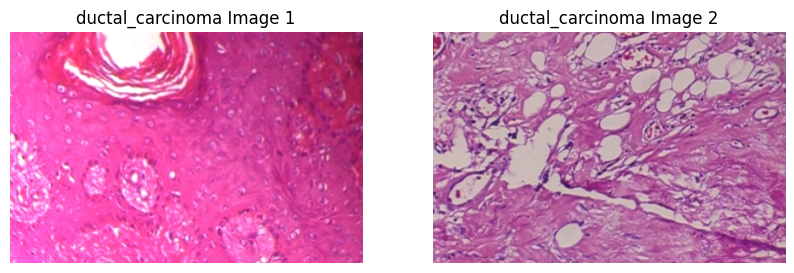

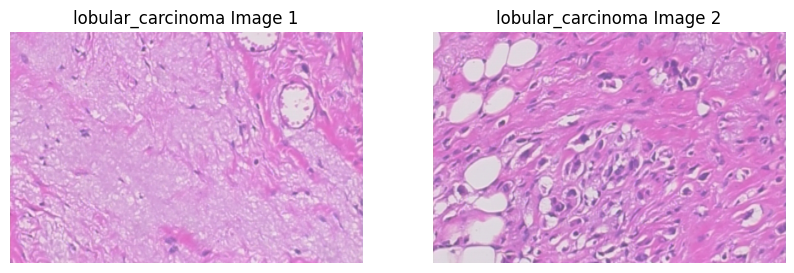

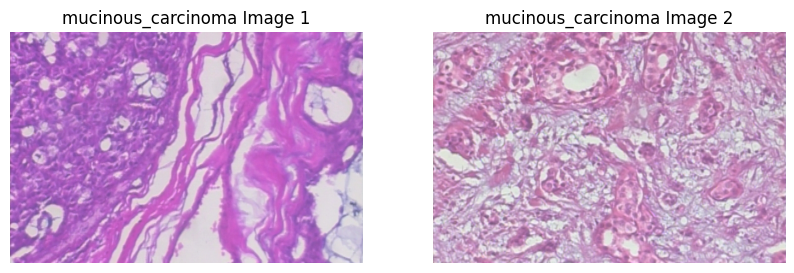

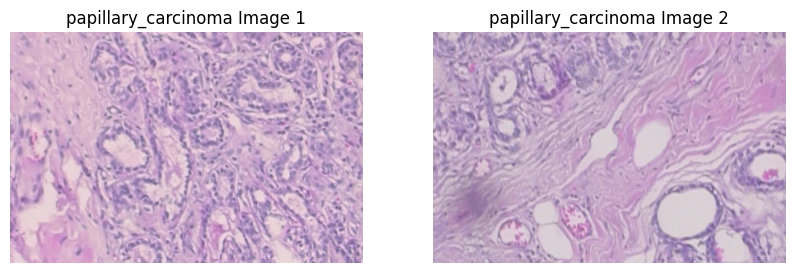

In [14]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the base path for the images
base_path = "/content/drive/MyDrive/extracted_breast_cancer/BREAST CANCER/malignant"

# List of subdirectories to check
subdirectories = ["ductal_carcinoma", "lobular_carcinoma", "mucinous_carcinoma", "papillary_carcinoma"]

# Function to list PNG images in the directory
def list_images_in_directory(directory):
    try:
        files = os.listdir(directory)
        # Filter for PNG files
        png_files = [f for f in files if f.lower().endswith('.png')]
        full_paths = [os.path.join(directory, f) for f in png_files]
        return full_paths
    except Exception as e:
        print(f"Error accessing directory {directory}: {e}")
        return []

# Function to display images
def display_images(image_paths, title):
    plt.figure(figsize=(10, 5))
    for i, image_path in enumerate(image_paths):
        img = mpimg.imread(image_path)
        plt.subplot(1, 2, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"{title} Image {i + 1}")
    plt.show()

# Loop through each subdirectory and display 2 images
for subdirectory in subdirectories:
    dir_path = os.path.join(base_path, subdirectory)
    if os.path.exists(dir_path):
        images = list_images_in_directory(dir_path)
        if images:
            # Select up to 2 images to display
            images_to_display = images[:2]
            display_images(images_to_display, subdirectory)
        else:
            print(f"No PNG images found in {subdirectory}.")
    else:
        print(f"Directory {dir_path} does not exist.")



In [15]:
# Function to count PNG images in each subfolder
def count_images(base_path, category, subfolders):
    print(f"Counting images in '{category}' category:")
    for subfolder in subfolders:
        dir_path = os.path.join(base_path, category, subfolder)
        if os.path.exists(dir_path):
            files = os.listdir(dir_path)
            png_files = [f for f in files if f.lower().endswith('.png')]
            count = len(png_files)
            print(f"{subfolder}: {count} PNG images")
        else:
            print(f"Directory {dir_path} does not exist.")

# Count and display the number of images in each benign subfolder
count_images(data_dir, 'benign', benign_subfolders)

# Count and display the number of images in each malignant subfolder
count_images(data_dir, 'malignant', malignant_subfolders)


Counting images in 'benign' category:
tubular_adenoma: 150 PNG images
fibroadenoma: 260 PNG images
adenosis: 113 PNG images
phyllodes_tumor: 121 PNG images
Counting images in 'malignant' category:
papillary_carcinoma: 142 PNG images
mucinous_carcinoma: 172 PNG images
lobular_carcinoma: 170 PNG images
ductal_carcinoma: 903 PNG images


In [16]:
import os
from PIL import Image

# Initialize a list to store image metadata
image_data = []

# List of image file extensions
image_exts = ['.png']

# Function to extract image data from subfolders
def extract_image_data(base_dir, class_name, subfolders):
    for subfolder in subfolders:
        subfolder_path = os.path.join(base_dir, class_name, subfolder)
        if os.path.isdir(subfolder_path):
            for file in os.listdir(subfolder_path):
                if any(file.endswith(ext) for ext in image_exts):
                    file_path = os.path.join(subfolder_path, file)
                    width, height = Image.open(file_path).size
                    image_data.append({
                        'File Path': file_path,
                        'Category': class_name,
                        'Subcategory': subfolder,
                        'Width': width,
                        'Height': height
                    })

# Base directory where the images are stored
data_dir = '/content/drive/MyDrive/extracted_breast_cancer/BREAST CANCER'

# Lists of subfolders for each category
benign_subfolders = ['tubular_adenoma', 'fibroadenoma', 'adenosis', 'phyllodes_tumor']
malignant_subfolders = ['papillary_carcinoma', 'mucinous_carcinoma', 'lobular_carcinoma', 'ductal_carcinoma']

# Extract data for benign and malignant categories
extract_image_data(data_dir, 'benign', benign_subfolders)
extract_image_data(data_dir, 'malignant', malignant_subfolders)

# Check the collected data
print(image_data)






[{'File Path': '/content/drive/MyDrive/extracted_breast_cancer/BREAST CANCER/benign/tubular_adenoma/SOB_B_TA-14-21978AB-100-018.png', 'Category': 'benign', 'Subcategory': 'tubular_adenoma', 'Width': 700, 'Height': 460}, {'File Path': '/content/drive/MyDrive/extracted_breast_cancer/BREAST CANCER/benign/tubular_adenoma/SOB_B_TA-14-16184-100-022.png', 'Category': 'benign', 'Subcategory': 'tubular_adenoma', 'Width': 700, 'Height': 460}, {'File Path': '/content/drive/MyDrive/extracted_breast_cancer/BREAST CANCER/benign/tubular_adenoma/SOB_B_TA-14-16184-100-023.png', 'Category': 'benign', 'Subcategory': 'tubular_adenoma', 'Width': 700, 'Height': 460}, {'File Path': '/content/drive/MyDrive/extracted_breast_cancer/BREAST CANCER/benign/tubular_adenoma/SOB_B_TA-14-16184-100-021.png', 'Category': 'benign', 'Subcategory': 'tubular_adenoma', 'Width': 700, 'Height': 460}, {'File Path': '/content/drive/MyDrive/extracted_breast_cancer/BREAST CANCER/benign/tubular_adenoma/SOB_B_TA-14-19854C-100-009.png

In [17]:
# Create a DataFrame from the image metadata
df_data = pd.DataFrame(image_data)

# Display the first few rows of the DataFrame
print (df_data.head())
print (df_data.tail())

# Display keys
df_data.keys()

# # Calculate statistics for Width and Height
width_stats = df_data['Width'].describe()
height_stats = df_data['Height'].describe()

print("Width Statistics:\n", width_stats)
print("\nHeight Statistics:\n", height_stats)

df1=df_data.copy()


                                           File Path Category  \
0  /content/drive/MyDrive/extracted_breast_cancer...   benign   
1  /content/drive/MyDrive/extracted_breast_cancer...   benign   
2  /content/drive/MyDrive/extracted_breast_cancer...   benign   
3  /content/drive/MyDrive/extracted_breast_cancer...   benign   
4  /content/drive/MyDrive/extracted_breast_cancer...   benign   

       Subcategory  Width  Height  
0  tubular_adenoma    700     460  
1  tubular_adenoma    700     460  
2  tubular_adenoma    700     460  
3  tubular_adenoma    700     460  
4  tubular_adenoma    700     460  
                                              File Path   Category  \
2026  /content/drive/MyDrive/extracted_breast_cancer...  malignant   
2027  /content/drive/MyDrive/extracted_breast_cancer...  malignant   
2028  /content/drive/MyDrive/extracted_breast_cancer...  malignant   
2029  /content/drive/MyDrive/extracted_breast_cancer...  malignant   
2030  /content/drive/MyDrive/extracted_brea

## Data understanding and preview as a  Data Frame

In [18]:
df_data.head(8)

File Path Category  \
0  /content/drive/MyDrive/extracted_breast_cancer...   benign   
1  /content/drive/MyDrive/extracted_breast_cancer...   benign   
2  /content/drive/MyDrive/extracted_breast_cancer...   benign   
3  /content/drive/MyDrive/extracted_breast_cancer...   benign   
4  /content/drive/MyDrive/extracted_breast_cancer...   benign   
5  /content/drive/MyDrive/extracted_breast_cancer...   benign   
6  /content/drive/MyDrive/extracted_breast_cancer...   benign   
7  /content/drive/MyDrive/extracted_breast_cancer...   benign   

       Subcategory  Width  Height  
0  tubular_adenoma    700     460  
1  tubular_adenoma    700     460  
2  tubular_adenoma    700     460  
3  tubular_adenoma    700     460  
4  tubular_adenoma    700     460  
5  tubular_adenoma    700     460  
6  tubular_adenoma    700     460  
7  tubular_adenoma    700     460

In [19]:
# Check data types
print("Data types of columns:")
print(df_data.dtypes)



Data types of columns:
File Path      object
Category       object
Subcategory    object
Width           int64
Height          int64
dtype: object


# C. DATA CLEANING

In [20]:
# Check for duplicate rows
duplicates = df_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Remove duplicate rows
df = df_data.drop_duplicates()

print(f"Number of rows after removing duplicates: {len(df)}")

Number of duplicate rows: 0
Number of rows after removing duplicates: 2031


In [21]:
# Check for missing values in the dataframe
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
File Path      0
Category       0
Subcategory    0
Width          0
Height         0
dtype: int64


In [22]:
# Calculate statistics for Width and Height
width_stats = df_data['Width'].describe()
height_stats = df_data['Height'].describe()

print("Width Statistics:\n", width_stats)
print("\nHeight Statistics:\n", height_stats)

Width Statistics:
 count    2031.0
mean      700.0
std         0.0
min       700.0
25%       700.0
50%       700.0
75%       700.0
max       700.0
Name: Width, dtype: float64

Height Statistics:
 count    2031.000000
mean      459.958641
std         0.404729
min       456.000000
25%       460.000000
50%       460.000000
75%       460.000000
max       460.000000
Name: Height, dtype: float64


# D. EXPLORATORY DATA ANALYSIS


DISPLAY IMAGES

Displaying benign images:


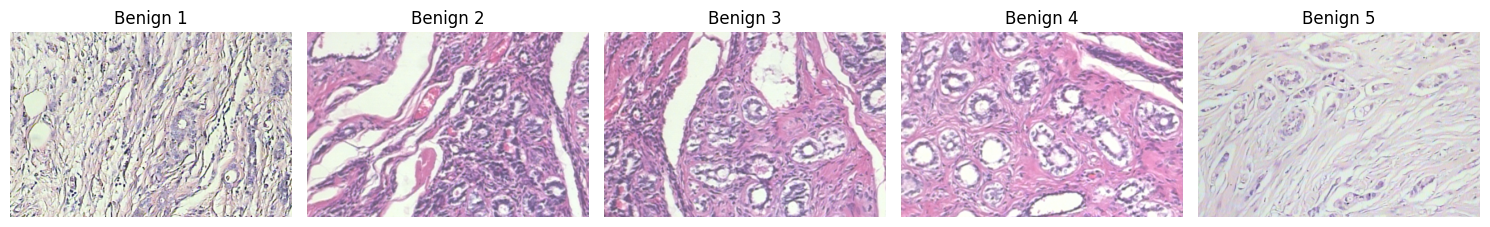

Displaying malignant images:


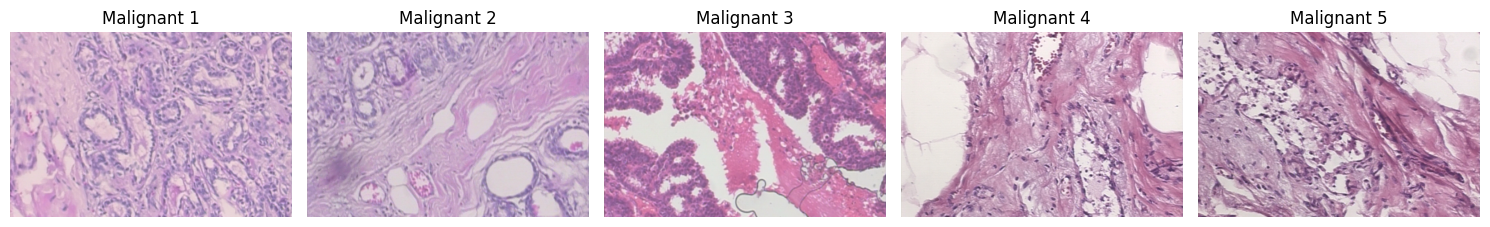

In [23]:
# Function to display images in a grid
def display_images(images, titles, cols=5):
    rows = (len(images) + cols - 1) // cols
    plt.figure(figsize=(15, rows * 3))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(img)
        plt.title(title)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Filter the DataFrame for 'benign' and 'malignant'
benign_df = df_data[df_data['Category'] == 'benign']
malignant_df = df_data[df_data['Category'] == 'malignant']

# Select 5 images from each category
benign_images = [Image.open(row['File Path']) for _, row in benign_df.head(5).iterrows()]
malignant_images = [Image.open(row['File Path']) for _, row in malignant_df.head(5).iterrows()]

# Titles for the images
benign_titles = [f"Benign {i+1}" for i in range(5)]
malignant_titles = [f"Malignant {i+1}" for i in range(5)]

# Display the images
print("Displaying benign images:")
display_images(benign_images, benign_titles)
print("Displaying malignant images:")
display_images(malignant_images, malignant_titles)


CLASS DISTRIBUTION

In [24]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
# Function to display images in a grid
def display_images(images, titles, cols=5):
    rows = (len(images) + cols - 1) // cols
    plt.figure(figsize=(15, rows * 3))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(rows, cols, i + 1)
        plt.imshow(img)
        plt.title(title)
        plt.axis('off')
    plt.tight_layout()
    plt.show()



<ipython-input-25-1569df68cd4e>:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Class', y='Number of Images', data=class_counts, palette=palette, ci=None)
<ipython-input-25-1569df68cd4e>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Class', y='Number of Images', data=class_counts, palette=palette, ci=None)


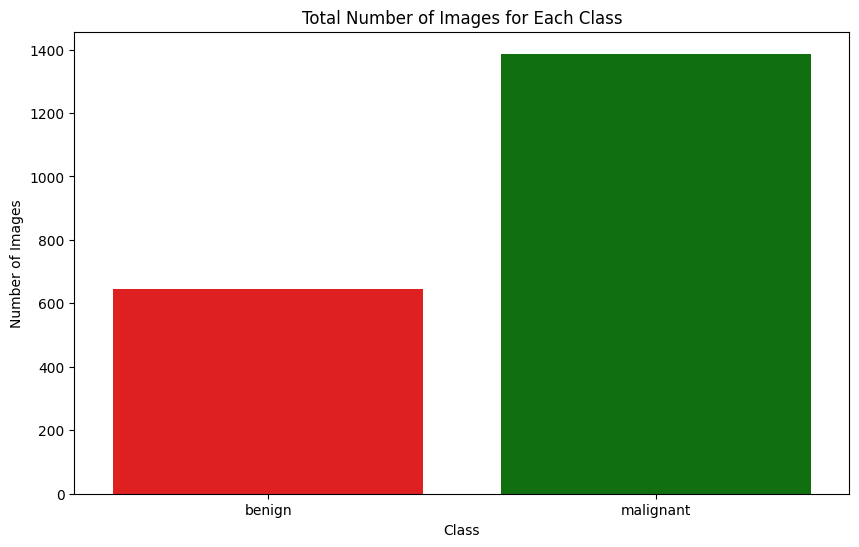

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data (replace this with your actual DataFrame)
data = {
    "Category": ["benign", "benign", "benign", "benign", "malignant", "malignant", "malignant", "malignant"],
    "Subfolder": ["tubular_adenoma", "fibroadenoma", "adenosis", "phyllodes_tumor",
                  "papillary_carcinoma", "mucinous_carcinoma", "lobular_carcinoma", "ductal_carcinoma"],
    "Image Count": [150, 260, 113, 121, 142, 172, 170, 903]
}
df_data = pd.DataFrame(data)

# Calculate the total number of images for each class
class_counts = df_data.groupby('Category')['Image Count'].sum().reset_index()
class_counts.columns = ['Class', 'Number of Images']

# Define the color palette
palette = {'benign': 'red', 'malignant': 'green'}

# Plot the total number of images for each class
plt.figure(figsize=(10, 6))
sns.barplot(x='Class', y='Number of Images', data=class_counts, palette=palette, ci=None)
plt.title('Total Number of Images for Each Class')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()


COUNTS BY SUBCATEGORY

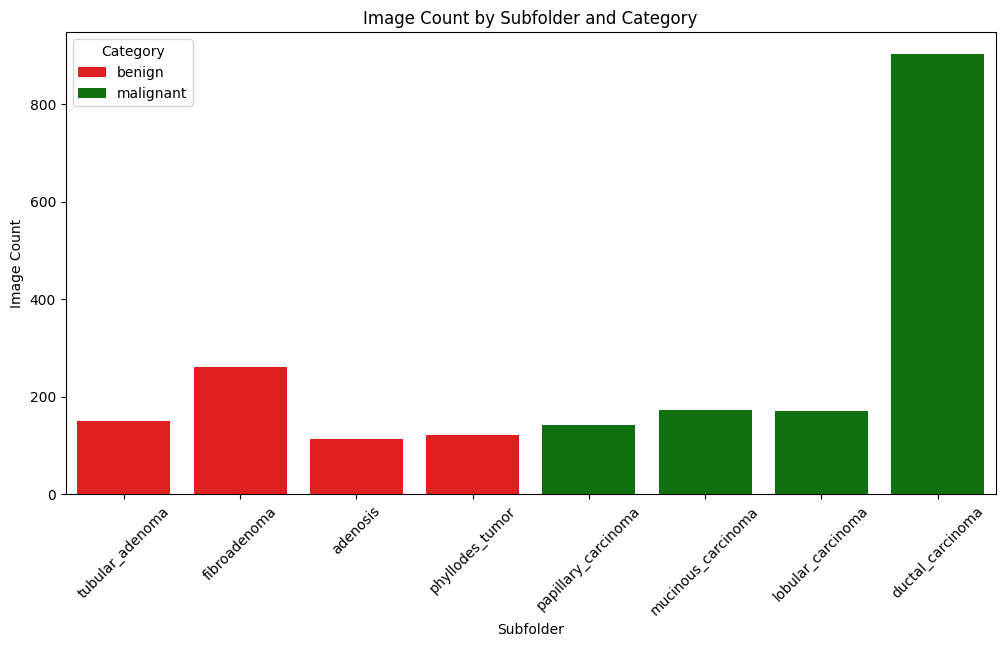

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data for counts (replace with actual counts)
data = {
    "Category": ["benign", "benign", "benign", "benign", "malignant", "malignant", "malignant", "malignant"],
    "Subfolder": ["tubular_adenoma", "fibroadenoma", "adenosis", "phyllodes_tumor",
                  "papillary_carcinoma", "mucinous_carcinoma", "lobular_carcinoma", "ductal_carcinoma"],
    "Image Count": [150, 260, 113, 121, 142, 172, 170, 903]
}

# Create DataFrame
df_counts = pd.DataFrame(data)

# Define the color palette
palette = {'benign': 'red', 'malignant': 'green'}

# Plotting counts
plt.figure(figsize=(12, 6))
sns.barplot(x="Subfolder", y="Image Count", hue="Category", data=df_counts, palette=palette)
plt.xticks(rotation=45)
plt.title("Image Count by Subfolder and Category")
plt.xlabel("Subfolder")
plt.ylabel("Image Count")
plt.legend(title='Category')
plt.show()


The above visualizations illustrate a class imbalance between benign and malignant categories.

In [27]:
df_data.columns

Index(['Category', 'Subfolder', 'Image Count'], dtype='object')

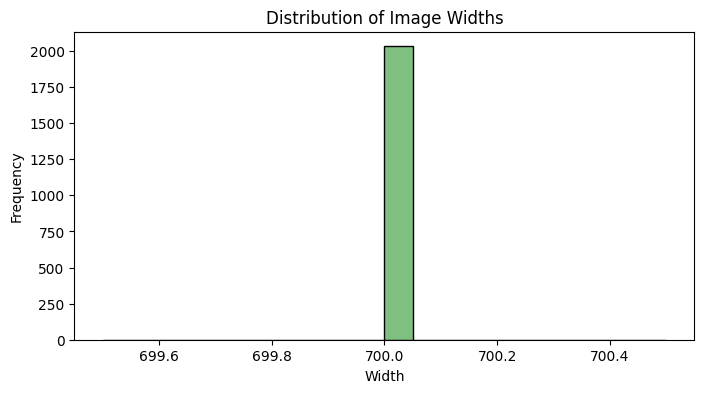

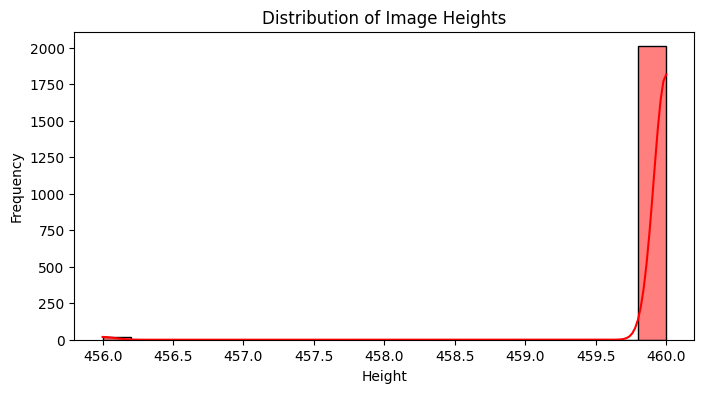

In [28]:
# Plot distribution of image widths
plt.figure(figsize=(8, 4))
sns.histplot(df1['Width'], kde=True, bins=20, color='green')
plt.title('Distribution of Image Widths')
plt.xlabel('Width')
plt.ylabel('Frequency')
plt.show()

# Plot distribution of image heights
plt.figure(figsize=(8, 4))
sns.histplot(df1['Height'], kde=True, bins=20, color='red')
plt.title('Distribution of Image Heights')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()


The above visualizations reveal that all images have the same width while their heights vary, with a majority of images having one specific height.

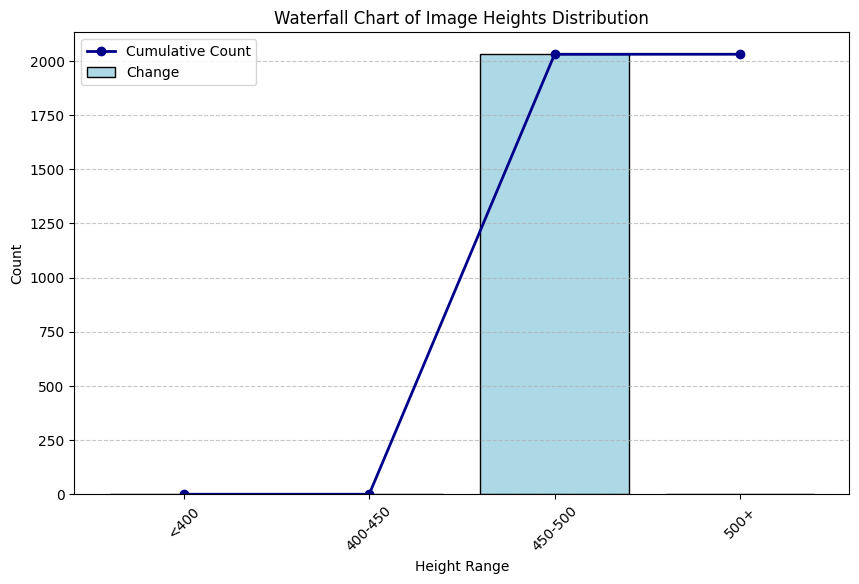

In [29]:
# cumulative distribution of image heights

# Create bins for heights
bins = [0, 400, 450, 500, 550]
labels = ['<400', '400-450', '450-500', '500+']
df1['Height Binned'] = pd.cut(df1['Height'], bins=bins, labels=labels, right=False)

# Count the frequency of each bin
height_counts = df1['Height Binned'].value_counts().sort_index()

# Prepare data for waterfall chart
waterfall_data = height_counts.cumsum().reset_index()
waterfall_data.columns = ['Height Range', 'Cumulative Count']
waterfall_data['Start'] = waterfall_data['Cumulative Count'].shift(1, fill_value=0)
waterfall_data['Change'] = waterfall_data['Cumulative Count'] - waterfall_data['Start']

# Plot the waterfall chart
plt.figure(figsize=(10, 6))
plt.bar(waterfall_data['Height Range'], waterfall_data['Change'], color='lightblue', edgecolor='black', label='Change')
plt.plot(waterfall_data['Height Range'], waterfall_data['Cumulative Count'], marker='o', color='darkblue', linestyle='-', linewidth=2, label='Cumulative Count')

# Add labels and title
plt.xlabel('Height Range')
plt.ylabel('Count')
plt.title('Waterfall Chart of Image Heights Distribution')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [30]:
df_data.head(2)

Category        Subfolder  Image Count
0   benign  tubular_adenoma          150
1   benign     fibroadenoma          260

In [31]:
pip install opencv-python numpy

In [32]:

# Assuming df_data has been created and df1 is a copy
# Standardizing the data (mean=0, variance=1) for PCA
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df1[['Width', 'Height']])

# Apply PCA
pca = PCA(n_components=2)  # You can adjust n_components based on how much variance you want to retain
pca_features = pca.fit_transform(scaled_features)

# Add PCA features to the DataFrame
df1['PCA1'] = pca_features[:, 0]
df1['PCA2'] = pca_features[:, 1]

# Explained variance by each principal component
explained_variance = pca.explained_variance_ratio_

# Displaying results
print("Explained variance ratio by each PCA component:", explained_variance)
print("\nData with PCA components:\n", df1.head())


Explained variance ratio by each PCA component: [1. 0.]

Data with PCA components:
                                            File Path Category  \
0  /content/drive/MyDrive/extracted_breast_cancer...   benign   
1  /content/drive/MyDrive/extracted_breast_cancer...   benign   
2  /content/drive/MyDrive/extracted_breast_cancer...   benign   
3  /content/drive/MyDrive/extracted_breast_cancer...   benign   
4  /content/drive/MyDrive/extracted_breast_cancer...   benign   

       Subcategory  Width  Height Height Binned      PCA1  PCA2  
0  tubular_adenoma    700     460       450-500 -0.102214   0.0  
1  tubular_adenoma    700     460       450-500 -0.102214  -0.0  
2  tubular_adenoma    700     460       450-500 -0.102214  -0.0  
3  tubular_adenoma    700     460       450-500 -0.102214  -0.0  
4  tubular_adenoma    700     460       450-500 -0.102214  -0.0  


This identifies clusters & patterns in the data: images from the same category tend to cluster together, indicate that the features are effective in capturing the underlying structure of the data. The graph reveal how different categories are related to each other in the feature space. This allows us to visualize the similarities and differences between images based on their extracted features in a 2D space, making it easier to understand the structure of the data.

From this we can see that:

**Outliers**- Points that are far away from the main clusters indicate unusual or outlier images.

**Class imbalance** - presence of imbalance with one category having higher data representation (malignant)

IMAGE INTENSITY DISTRIBUTION

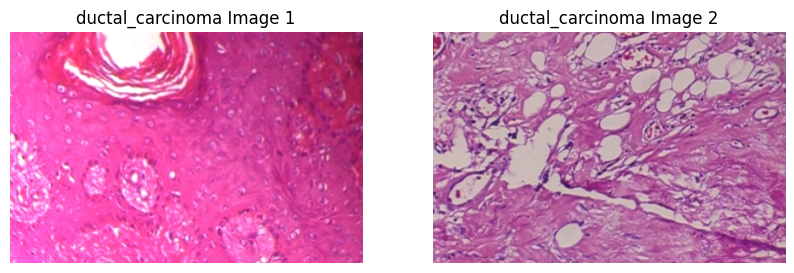

<ipython-input-33-7f4ca4a82d46>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(intensities, shade=True)


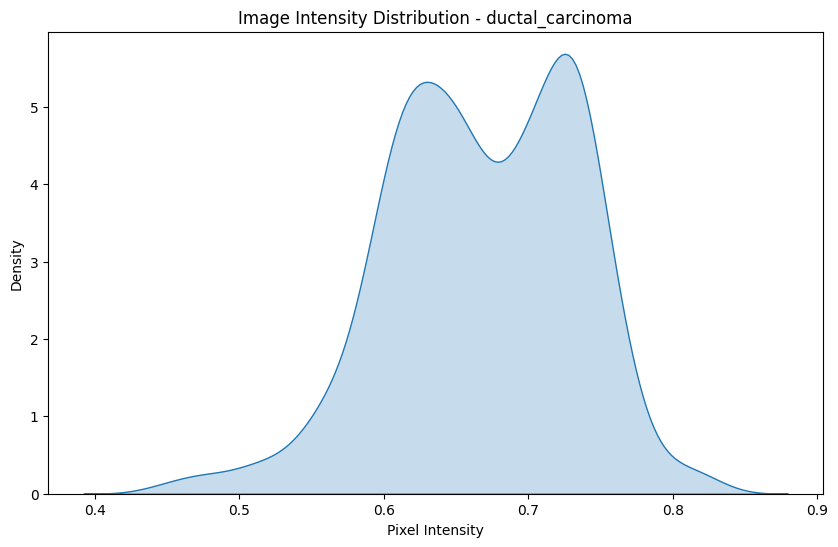

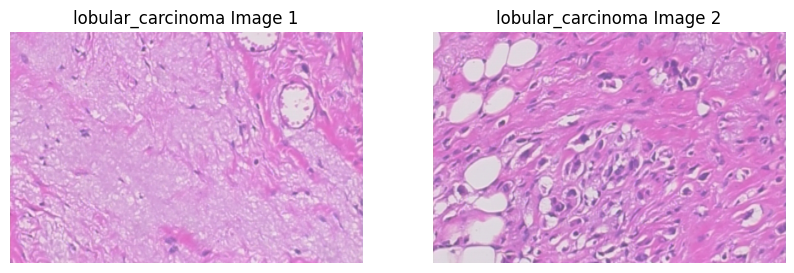

<ipython-input-33-7f4ca4a82d46>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(intensities, shade=True)


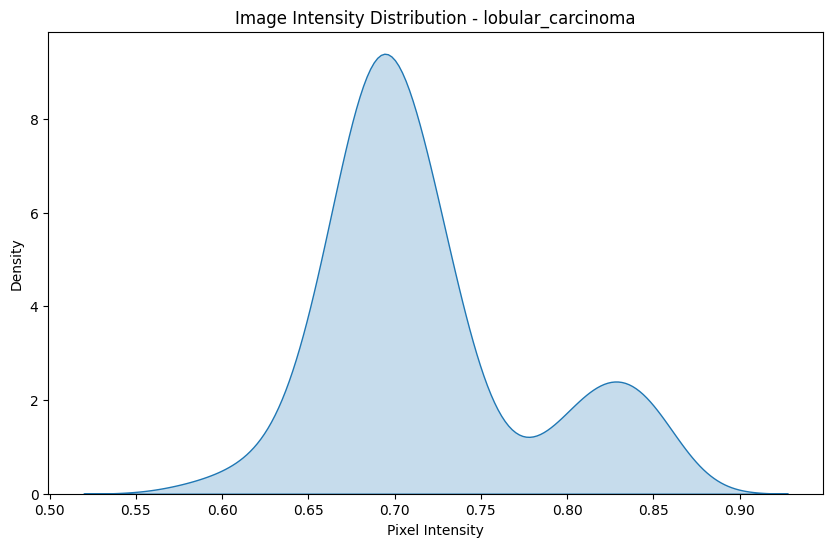

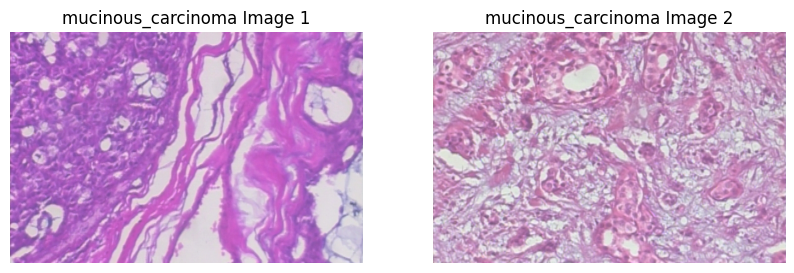

<ipython-input-33-7f4ca4a82d46>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(intensities, shade=True)


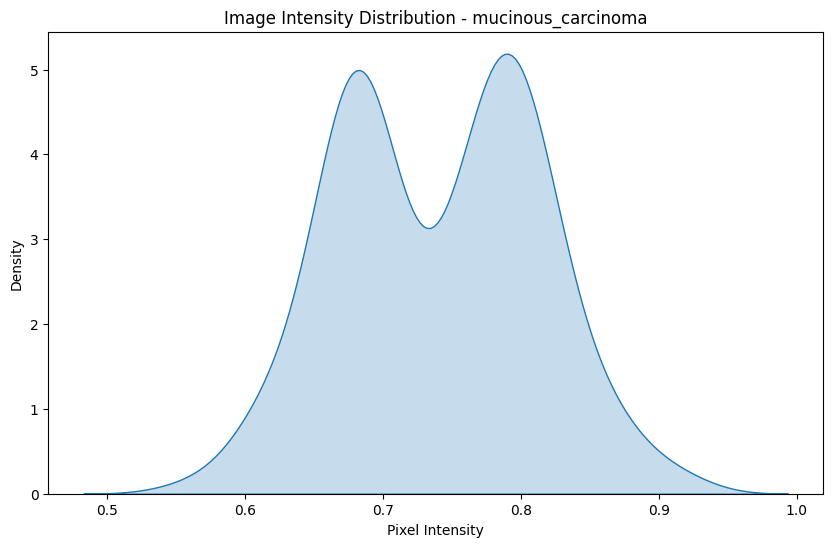

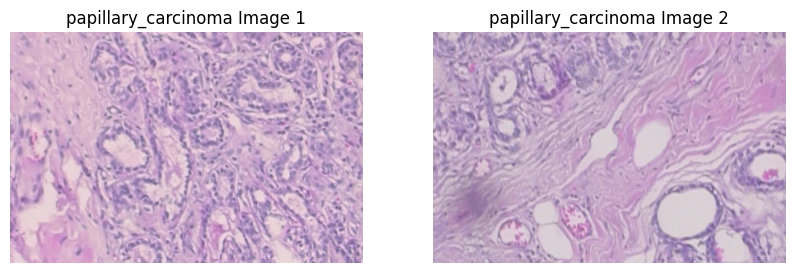

<ipython-input-33-7f4ca4a82d46>:50: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(intensities, shade=True)


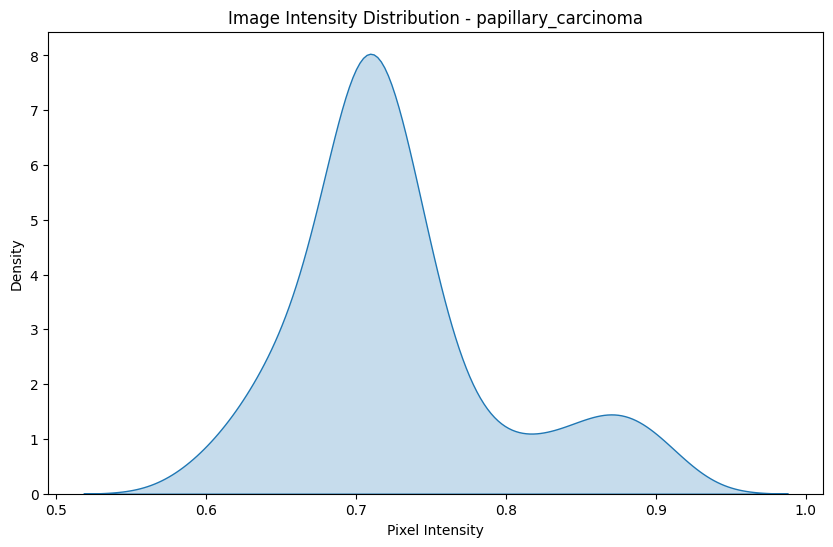

In [33]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from PIL import Image

# Define the base path for the images
base_path = "/content/drive/MyDrive/extracted_breast_cancer/BREAST CANCER/malignant"

# List of subdirectories to check
subdirectories = ["ductal_carcinoma", "lobular_carcinoma", "mucinous_carcinoma", "papillary_carcinoma"]

# Function to list PNG images in the directory
def list_images_in_directory(directory):
    try:
        files = os.listdir(directory)
        # Filter for PNG files
        png_files = [f for f in files if f.lower().endswith('.png')]
        full_paths = [os.path.join(directory, f) for f in png_files]
        return full_paths
    except Exception as e:
        print(f"Error accessing directory {directory}: {e}")
        return []

# Function to display images
def display_images(image_paths, title):
    plt.figure(figsize=(10, 5))
    for i, image_path in enumerate(image_paths):
        img = mpimg.imread(image_path)
        plt.subplot(1, 2, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"{title} Image {i + 1}")
    plt.show()

# Function to calculate and plot intensity distribution
def plot_intensity_distribution(image_paths, title):
    intensities = []
    for image_path in image_paths:
        try:
            img = Image.open(image_path).convert('L')  # Convert to grayscale
            img_array = np.array(img).astype(np.float32) / 255.0  # Normalize pixel values to [0, 1]
            intensities.append(img_array.mean())
        except Exception as e:
            print(f"Error processing image {image_path}: {e}")

    # Plot intensity distribution
    plt.figure(figsize=(10, 6))
    sns.kdeplot(intensities, shade=True)
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Density')
    plt.title(f'Image Intensity Distribution - {title}')
    plt.show()

# Loop through each subdirectory, display 2 images and plot intensity distribution
for subdirectory in subdirectories:
    dir_path = os.path.join(base_path, subdirectory)
    if os.path.exists(dir_path):
        images = list_images_in_directory(dir_path)
        if images:
            # Select up to 2 images to display
            images_to_display = images[:2]
            display_images(images_to_display, subdirectory)

            # Plot intensity distribution
            plot_intensity_distribution(images, subdirectory)
        else:
            print(f"No PNG images found in {subdirectory}.")
    else:
        print(f"Directory {dir_path} does not exist.")


The brightness distribution indicates that benign images exhibit a higher peak brightness compared to malignant images, suggesting that benign images are generally brighter on average. In contrast, malignant images show a wider spread in brightness values, which may reflect variability in image acquisition conditions or differences in the nature of the disease affecting the brightness distribution.

IMAGE ASPECT RATIO DISTRIBUTION

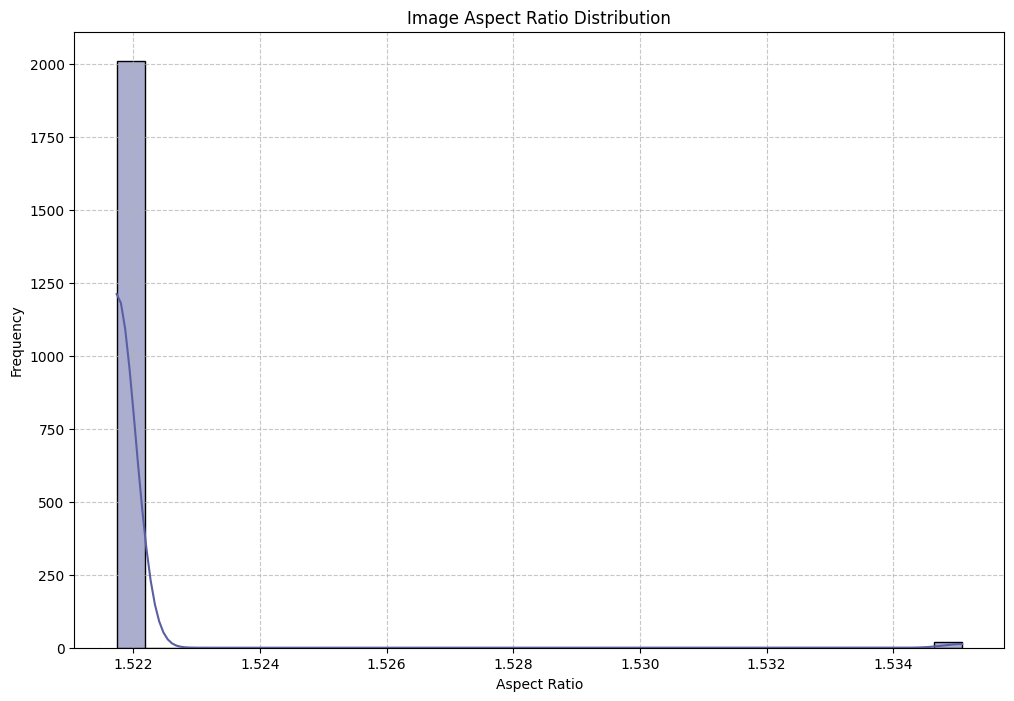

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Function to plot aspect ratio distribution
def plot_aspect_ratio_distribution(df_data):
    # Compute aspect ratios
    aspect_ratios = df1['Width'] / df1['Height']

    plt.figure(figsize=(12, 8))
    sns.histplot(aspect_ratios, kde=True, color='#5a5ea3', bins=30)
    plt.xlabel('Aspect Ratio')
    plt.ylabel('Frequency')
    plt.title('Image Aspect Ratio Distribution')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.show()

# Assuming df_data is your DataFrame
plot_aspect_ratio_distribution(df_data)


Aspect ratio distribution checks the proportion of an image’s width to its height, revealing the general shape and format of the images. In your dataset, the distribution shows that most images have an aspect ratio of approximately 1.522, indicating that they are predominantly rectangular with width slightly larger than height. There are a few images with an aspect ratio of 1.535, which are less common. This highlights that while the majority of images have a consistent rectangular format, there are some variations.

In [35]:
def get_image_array(file_path):
    """
    Retrieve a particular image array given the file path before preprocessing.

    Parameters:
    - file_path (str): The full path to the image file.

    Returns:
    - img_array (numpy array): The image as a NumPy array.
    """
    img = Image.open(file_path).convert('RGB')
    img_array = np.array(img)
    return img_array

# Path to the specific image file
image_path = '/content/drive/MyDrive/extracted_breast_cancer/BREAST CANCER/benign/tubular_adenoma_SOB_B_TA-14-16184-100-022.png'

# Load the image and get its array
try:
    image_array = get_image_array(image_path)
    print(f"Image path: {image_path}")
    print(f"Image array shape: {image_array.shape}")

    # Display the image
    plt.imshow(image_array)
    plt.title(f"Image: {os.path.basename(image_path)}")
    plt.axis('off')
    plt.show()
except FileNotFoundError as e:
    print(e)




[Errno 2] No such file or directory: '/content/drive/MyDrive/extracted_breast_cancer/BREAST CANCER/benign/tubular_adenoma_SOB_B_TA-14-16184-100-022.png'


# F. DATA PREPROCESSING

1. Resizing the Images
2. Transforming the data
3. Consolidating the Images
4. Train Test Split


**Resizing the Images**

Downscaling the images to a specified size (224x224 by default) and then flattens it into a 1D array.

The flattened feature array of shape (150528,) indicates that the image was resized correctly to (224, 224) pixels and flattened as expected.

**Transforming the Data**




In [36]:
# Transforming my data to the two distinct classes
import os
import shutil

# Define the source directory
images_dir = '/content/drive/MyDrive/consolidated_images'

# Define the target directories
benign_dir = os.path.join(images_dir, 'benign')
malignant_dir = os.path.join(images_dir, 'malignant')

# Create the target directories if they don't exist
os.makedirs(benign_dir, exist_ok=True)
os.makedirs(malignant_dir, exist_ok=True)

# Move images into the respective directories
for filename in os.listdir(images_dir):
    file_path = os.path.join(images_dir, filename)
    if os.path.isfile(file_path):  # Ensure it's a file
        if 'benign' in filename:
            shutil.move(file_path, os.path.join(benign_dir, filename))
        elif 'malignant' in filename:
            shutil.move(file_path, os.path.join(malignant_dir, filename))

print("Images have been reorganized into 'benign' and 'malignant' folders.")



Images have been reorganized into 'benign' and 'malignant' folders.


In [37]:
import os
import shutil
from PIL import Image

# Define the source directory
images_dir = '/content/drive/MyDrive/consolidated_images'

# Define the target directories
benign_dir = os.path.join(images_dir, 'benign')
malignant_dir = os.path.join(images_dir, 'malignant')

# Create the target directories if they don't exist
os.makedirs(benign_dir, exist_ok=True)
os.makedirs(malignant_dir, exist_ok=True)

# Move images into the respective directories
for filename in os.listdir(images_dir):
    file_path = os.path.join(images_dir, filename)
    if os.path.isfile(file_path):  # Ensure it's a file
        if 'benign' in filename:
            shutil.move(file_path, os.path.join(benign_dir, filename))
        elif 'malignant' in filename:
            shutil.move(file_path, os.path.join(malignant_dir, filename))

print("Images have been reorganized into 'benign' and 'malignant' folders.")

# Function to verify images and remove any bad images
def verify_and_remove_bad_images(directory):
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        try:
            with Image.open(file_path) as img:
                img.verify()  # Verify if the image can be opened and is not corrupted
        except (IOError, SyntaxError) as e:
            print(f"Removing bad image: {file_path} - Error: {e}")
            os.remove(file_path)

# Verify and clean images in the benign and malignant directories
print("Verifying images in 'benign' directory...")
verify_and_remove_bad_images(benign_dir)
print("Verifying images in 'malignant' directory...")
verify_and_remove_bad_images(malignant_dir)

print("Image verification and cleanup complete.")


Images have been reorganized into 'benign' and 'malignant' folders.
Verifying images in 'benign' directory...
Verifying images in 'malignant' directory...
Image verification and cleanup complete.


In [38]:
import os

# Replace with the actual path to your directory
directory_path = "/content/drive/MyDrive/consolidated_images/"

for root, dirs, files in os.walk(directory_path):
    for file in files:
        print(os.path.join(root, file))

/content/drive/MyDrive/consolidated_images/train/benign/benign_tubular_adenoma_SOB_B_TA-14-16184-100-009.png
/content/drive/MyDrive/consolidated_images/train/benign/benign_tubular_adenoma_SOB_B_TA-14-16184-100-023.png
/content/drive/MyDrive/consolidated_images/train/benign/benign_tubular_adenoma_SOB_B_TA-14-16184-100-025.png
/content/drive/MyDrive/consolidated_images/train/benign/benign_tubular_adenoma_SOB_B_TA-14-16184CD-100-015.png
/content/drive/MyDrive/consolidated_images/train/benign/benign_tubular_adenoma_SOB_B_TA-14-16184CD-100-029.png
/content/drive/MyDrive/consolidated_images/train/benign/benign_tubular_adenoma_SOB_B_TA-14-13200-100-009.png
/content/drive/MyDrive/consolidated_images/train/benign/benign_tubular_adenoma_SOB_B_TA-14-16184CD-100-007.png
/content/drive/MyDrive/consolidated_images/train/benign/benign_tubular_adenoma_SOB_B_TA-14-16184CD-100-012.png
/content/drive/MyDrive/consolidated_images/train/benign/benign_tubular_adenoma_SOB_B_TA-14-16184CD-100-009.png
/content/

**Train-Test Split**

In [39]:

# Define the source directory
images_dir = '/content/drive/MyDrive/consolidated_images'

# Define the target directories
train_dir = os.path.join(images_dir, 'train')
val_dir = os.path.join(images_dir, 'val')
test_dir = os.path.join(images_dir, 'test')

# Create the target directories if they don't exist
for category in ['benign', 'malignant']:
    os.makedirs(os.path.join(train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(val_dir, category), exist_ok=True)
    os.makedirs(os.path.join(test_dir, category), exist_ok=True)

# Function to split the dataset
def split_data(src_dir, train_dir, val_dir, test_dir, split_ratio=(0.7, 0.15, 0.15)):
    for category in ['benign', 'malignant']:
        category_dir = os.path.join(src_dir, category)
        images = os.listdir(category_dir)
        random.shuffle(images)

        train_split = int(split_ratio[0] * len(images))
        val_split = int(split_ratio[1] * len(images)) + train_split

        train_images = images[:train_split]
        val_images = images[train_split:val_split]
        test_images = images[val_split:]

        for image in train_images:
            shutil.move(os.path.join(category_dir, image), os.path.join(train_dir, category, image))

        for image in val_images:
            shutil.move(os.path.join(category_dir, image), os.path.join(val_dir, category, image))

        for image in test_images:
            shutil.move(os.path.join(category_dir, image), os.path.join(test_dir, category, image))

# Split the data
split_data(images_dir, train_dir, val_dir, test_dir)

print("Images have been reorganized into 'train', 'val', and 'test' folders.")


Images have been reorganized into 'train', 'val', and 'test' folders.


**Showing batch images in the train, test and validation folders**

In [40]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the paths to your image directories
train_dir = '/content/drive/MyDrive/consolidated_images/train'
val_dir = '/content/drive/MyDrive/consolidated_images/val'
test_dir = '/content/drive/MyDrive/consolidated_images/test'

# Define the data augmentation for the training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# For validation and test data, we only need to rescale
test_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=16,
    class_mode='binary'
)

val_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=16,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=16,
    class_mode='binary'
)


Found 1860 images belonging to 2 classes.
Found 562 images belonging to 2 classes.
Found 578 images belonging to 2 classes.


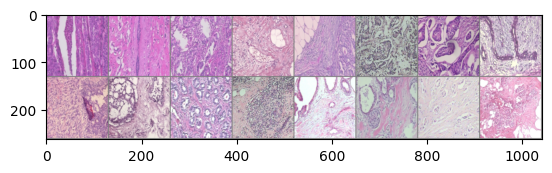

In [41]:
# Create the datasetimport torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
import numpy as np
import torchvision

# Define the transformation
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

batch_size = 16

# Define the paths to your image directories
train_dir = '/content/drive/MyDrive/consolidated_images/train'
val_dir = '/content/drive/MyDrive/consolidated_images/val'
test_dir = '/content/drive/MyDrive/consolidated_images/test'

# Create datasets
train_set = ImageFolder(root=train_dir, transform=transform)
val_set = ImageFolder(root=val_dir, transform=transform)
test_set = ImageFolder(root=test_dir, transform=transform)

# Create a DataLoader
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_set, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False)

# Function to unnormalize and show an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)), cmap='gray')
    plt.show()

# Get a batch of images
data_iter = iter(train_loader)
images, labels = next(data_iter)

# Show images
imshow(torchvision.utils.make_grid(images))

In [42]:
import os
from PIL import Image

def verify_images(directory):
    for subdir, _, files in os.walk(directory):
        for file in files:
            try:
                img_path = os.path.join(subdir, file)
                img = Image.open(img_path)
                img.verify()  # verify that it is an image
            except (IOError, SyntaxError) as e:
                print(f'Bad file: {img_path}')

# Check all directories
verify_images(train_dir)
verify_images(val_dir)
verify_images(test_dir)


In [43]:
import os
from PIL import Image

def delete_bad_images(directory):
    for subdir, _, files in os.walk(directory):
        for file in files:
            img_path = os.path.join(subdir, file)
            try:
                img = Image.open(img_path)
                img.verify()  # verify that it is an image
            except (IOError, SyntaxError) as e:
                print(f'Deleting bad file: {img_path}')
                os.remove(img_path)

# Delete bad images in all directories
delete_bad_images(train_dir)
delete_bad_images(val_dir)
delete_bad_images(test_dir)


In [44]:
train_set = ImageFolder(root=train_dir, transform=transform)
val_set = ImageFolder(root=val_dir, transform=transform)
test_set = ImageFolder(root=test_dir, transform=transform)

train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_set, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False)


In [44]:
#Visualizing images in the traioning data
# Set the number of rows and columns for the subplot grid
no_of_rows = 2
no_of_columns = 4

# Create a subplot grid with the specified number of rows and columns
fig, axes = plt.subplots(no_of_rows, no_of_columns, figsize=(12, 8))

# Iterate through the rows
for i in range(no_of_rows):
    # Iterate through the columns
    for j in range(no_of_columns):
        # Calculate the index for accessing the data
        index = i * no_of_columns + j

        # Check if the index is within the bounds of the data
        if index < len(training_data):

            # Open the image using the PIL library
            im = Image.open(training_data.iloc[index]['Path'])

            # Convert the PIL image to a NumPy array
            img = np.array(im)

            # Print the shape of the image array
            print(img.shape)

            # Display the image on the subplot at position (i, j)
            axes[i, j].imshow(img)

            # Turn off axis labels for better visualization
            axes[i, j].axis('off')

            # Get the label for the current image and display it as text
            label = training_data.iloc[index]['Label']
            axes[i, j].text(0.5, -0.1, label, ha='center', transform=axes[i, j].transAxes)

# Show the entire subplot grid
plt.show()

# F. MODELING

1. Densenet Model
2. Convolution Neural Network
3. VGG16


# 1. DENSENET MODEL

In [60]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torchvision.models as models
import numpy as np
!pip install torchsummary
!pip install optuna
from torch.optim import Adam, SGD
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.2 MB/s eta 0:00:00


Define the Objective Function
Creating an objective function that trains the model and evaluates its performance:

In [93]:

# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [94]:
# Load the pre-trained DenseNet-121 model
model = models.densenet121(pretrained=True)

# Modify the final layer to match the number of classes (e.g., 2 for binary classification)
num_features = model.classifier.in_features
model.classifier = nn.Linear(num_features, 2)

# Move the model to the appropriate device
model = model.to(device)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [95]:
#Define Loss Function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [96]:
def train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=25):
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
                dataloader = train_loader
            else:
                model.eval()   # Set model to evaluate mode
                dataloader = val_loader

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data
            for inputs, labels in dataloader:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Zero the parameter gradients
                optimizer.zero_grad()

                # Forward
                # Track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # Backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # Statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloader.dataset)
            epoch_acc = running_corrects.double() / len(dataloader.dataset)

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # Deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

    print('Best val Acc: {:4f}'.format(best_acc))

    # Load best model weights
    model.load_state_dict(best_model_wts)
    return model


## Train the Model

In [99]:
# Train the model
import copy

# Train the model
model = train_model(model, train_loader, val_loader, criterion, optimizer, num_epochs=15)



Epoch 1/15
----------
train Loss: 0.3892 Acc: 0.8409
val Loss: 0.2736 Acc: 0.8915
Epoch 2/15
----------
train Loss: 0.3186 Acc: 0.8747
val Loss: 0.4560 Acc: 0.8363
Epoch 3/15
----------
train Loss: 0.2561 Acc: 0.8957
val Loss: 0.2842 Acc: 0.8861
Epoch 4/15
----------
train Loss: 0.2603 Acc: 0.8995
val Loss: 0.1919 Acc: 0.9217
Epoch 5/15
----------
train Loss: 0.1830 Acc: 0.9269
val Loss: 0.1948 Acc: 0.9520
Epoch 6/15
----------
train Loss: 0.1913 Acc: 0.9312
val Loss: 0.1633 Acc: 0.9288
Epoch 7/15
----------
train Loss: 0.1360 Acc: 0.9441
val Loss: 0.2109 Acc: 0.9057
Epoch 8/15
----------
train Loss: 0.1585 Acc: 0.9366
val Loss: 0.6097 Acc: 0.8488
Epoch 9/15
----------
train Loss: 0.1327 Acc: 0.9532
val Loss: 0.1697 Acc: 0.9253
Epoch 10/15
----------
train Loss: 0.1285 Acc: 0.9511
val Loss: 0.1142 Acc: 0.9520
Epoch 11/15
----------
train Loss: 0.1277 Acc: 0.9559
val Loss: 0.0854 Acc: 0.9626
Epoch 12/15
----------
train Loss: 0.0890 Acc: 0.9661
val Loss: 0.0954 Acc: 0.9591
Epoch 13/15
-

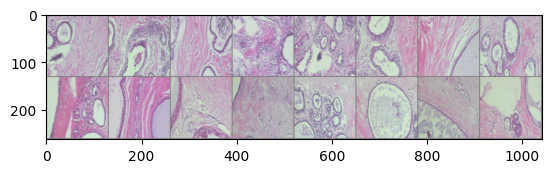

Predicted:  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
GroundTruth:  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


In [100]:
# Function to unnormalize and show an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get a batch of test images
data_iter = iter(test_loader)
images, labels = next(data_iter)

# Predict
images = images.to(device)
outputs = model(images)
_, preds = torch.max(outputs, 1)

# Show images and predictions
imshow(torchvision.utils.make_grid(images.cpu()))
print('Predicted: ', ' '.join(f'{preds[j].item()}' for j in range(len(preds))))
print('GroundTruth: ', ' '.join(f'{labels[j].item()}' for j in range(len(labels))))


**ROC AND AUC CURVE**

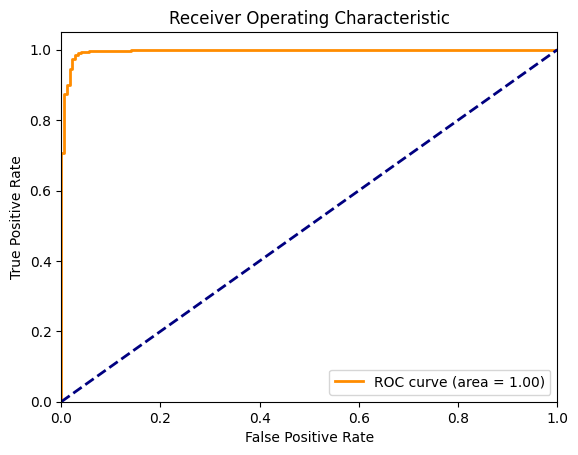

In [112]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


def plot_roc_curve(model, dataloader):
    model.eval()  # Set the model to evaluation mode
    true_labels = []
    pred_probs = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            probabilities = torch.softmax(outputs, dim=1)[:, 1]  # Get probabilities for the positive class
            true_labels.append(labels.cpu().numpy())
            pred_probs.append(probabilities.cpu().numpy())

    true_labels = np.concatenate(true_labels)
    pred_probs = np.concatenate(pred_probs)

    fpr, tpr, _ = roc_curve(true_labels, pred_probs)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Assuming 'val_loader' is your validation DataLoader
plot_roc_curve(model, val_loader)


In [113]:
# Save the model's state dictionary
torch.save(model.state_dict(), 'densenet_model.pth')

In [114]:
file_path = 'densenet_model.pth'
torch.save(model.state_dict(), file_path)
if os.path.isfile(file_path):
    print(f"Model successfully saved to {file_path}")
else:
    print(f"Failed to save the model to {file_path}")

Model successfully saved to densenet_model.pth


In [138]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score

def plot_confusion_matrix_and_metrics(model, dataloader, device):
    model.eval()  # Set the model to evaluation mode
    true_labels = []
    pred_labels = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            true_labels.append(labels.cpu().numpy())
            pred_labels.append(preds.cpu().numpy())

    true_labels = np.concatenate(true_labels)
    pred_labels = np.concatenate(pred_labels)

    cm = confusion_matrix(true_labels, pred_labels)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['benign', 'malignant'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()

    # Print and return the results as lists
    print("True Labels:", true_labels.tolist())
    print("Predicted Labels:", pred_labels.tolist())
    print("Confusion Matrix:\n", cm)

    # Calculate and print metrics
    accuracy = accuracy_score(true_labels, pred_labels)
    precision = precision_score(true_labels, pred_labels, average='macro')
    recall = recall_score(true_labels, pred_labels, average='macro')
    f1 = f1_score(true_labels, pred_labels, average='macro')

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    return true_labels.tolist(), pred_labels.tolist(), cm, accuracy, precision, recall, f1

# Example usage:
# Assuming 'val_loader' is your validation DataLoader and 'device' is your computing device (CPU or GPU)
true_labels, pred_labels, confusion_matrix, accuracy, precision, recall, f1 = plot_confusion_matrix_and_metrics(model, val_loader, device)


AttributeError: 'Sequential' object has no attribute 'eval'

From the confusion matrix:

True Negatives (TN): 169 (benign correctly classified as benign)

False Positives (FP): 10 (benign incorrectly classified as malignant)

False Negatives (FN): 3 (malignant incorrectly classified as benign)

True Positives (TP): 380 (malignant correctly classified as malignant)

**The model performs very well with high accuracy, precision, recall, and F1 score:**

* High Accuracy (97.69%): Most predictions made by the model are correct.
* High Precision (97.85%): Most predictions of malignant cases are accurate, meaning few benign cases are wrongly classified as malignant.
* High Recall (96.82%): Most actual malignant cases are correctly identified by the model, meaning few malignant cases are missed.
* High F1 Score (97.31%): Indicates a strong balance between precision and recall, suggesting overall excellent performance.

In conclusion, these metrics collectively show that the model is very effective at classifying benign and malignant cases, with minimal errors in both directions. This high level of performance is crucial for applications where both false positives and false negatives can have significant consequences, such as in medical diagnosis.

# Modeling with Convolution Neural Networks

**1. Defining the model architecture**

In [118]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from torchvision.datasets import ImageFolder
import torchvision
import matplotlib.pyplot as plt
import numpy as np



In [119]:
# Defining the Transformation
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

batch_size = 32

# Define the paths to your image directories
train_dir = '/content/drive/MyDrive/consolidated_images/train'
val_dir = '/content/drive/MyDrive/consolidated_images/val'
test_dir = '/content/drive/MyDrive/consolidated_images/test'

# Create datasets
train_set = ImageFolder(root=train_dir, transform=transform)
val_set = ImageFolder(root=val_dir, transform=transform)
test_set = ImageFolder(root=test_dir, transform=transform)

# Create a DataLoader
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_set, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=False)


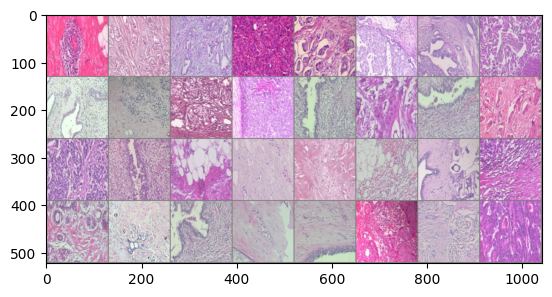

In [120]:
#Unnormalize and Show Images
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)), cmap='gray')
    plt.show()

# Get a batch of images
data_iter = iter(train_loader)
images, labels = next(data_iter)

# Show images
imshow(torchvision.utils.make_grid(images))


In [121]:
# Model Architecture
class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.fc1 = nn.Linear(64*31*31, 1000)
        self.fc2 = nn.Linear(1000, num_classes)

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.fc2(out)
        return out

num_classes = len(train_set.classes)
model = SimpleCNN(num_classes=num_classes)

# Print the model summary
summary(model, (3, 128, 128))  # Adjust input size based on your images


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 128, 128]             896
              ReLU-2         [-1, 32, 128, 128]               0
         MaxPool2d-3           [-1, 32, 64, 64]               0
            Conv2d-4           [-1, 64, 62, 62]          18,496
              ReLU-5           [-1, 64, 62, 62]               0
         MaxPool2d-6           [-1, 64, 31, 31]               0
            Linear-7                 [-1, 1000]      61,505,000
            Linear-8                    [-1, 2]           2,002
Total params: 61,526,394
Trainable params: 61,526,394
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.19
Forward/backward pass size (MB): 13.23
Params size (MB): 234.70
Estimated Total Size (MB): 248.12
----------------------------------------------------------------


Compiling the CNN

In [122]:
#Loss Function and Optimizer Calculation
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [123]:
# Accuracy Calculation
def calculate_accuracy(outputs, labels):
    _, predicted = torch.max(outputs, 1)
    correct = (predicted == labels).sum().item()
    return correct


In [124]:
# Training the CNN
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    running_corrects = 0
    for images, labels in train_loader:
        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
        running_corrects += calculate_accuracy(outputs, labels)

    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_accuracy = running_corrects / len(train_loader.dataset)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.4f}')


Epoch [1/10], Loss: 2.0270, Accuracy: 0.6618
Epoch [2/10], Loss: 0.4807, Accuracy: 0.7769
Epoch [3/10], Loss: 0.4247, Accuracy: 0.8290
Epoch [4/10], Loss: 0.3839, Accuracy: 0.8306
Epoch [5/10], Loss: 0.3507, Accuracy: 0.8624
Epoch [6/10], Loss: 0.3178, Accuracy: 0.8656
Epoch [7/10], Loss: 0.2763, Accuracy: 0.8887
Epoch [8/10], Loss: 0.2550, Accuracy: 0.9065
Epoch [9/10], Loss: 0.2448, Accuracy: 0.9102
Epoch [10/10], Loss: 0.1993, Accuracy: 0.9204


In [125]:
# Model Evaluation
model.eval()
with torch.no_grad():
    running_corrects = 0
    for images, labels in test_loader:
        outputs = model(images)
        running_corrects += calculate_accuracy(outputs, labels)
    test_accuracy = running_corrects / len(test_loader.dataset)
    print(f'Test Accuracy: {test_accuracy:.4f}')


Test Accuracy: 0.8824


In [126]:
import torch

# Assuming `model` is your PyTorch model
MODEL_PATH = '/content/drive/MyDrive/model/cnn_model.pth'

# Save the model
torch.save(model.state_dict(), MODEL_PATH)


Calculating the relevant Metrices

Test Accuracy: 0.8824
Precision: 0.8951, Recall: 0.8824, F1 Score: 0.8748, ROC AUC: 0.8205


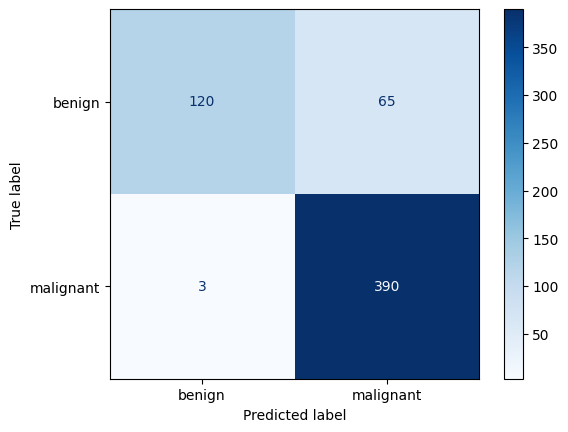

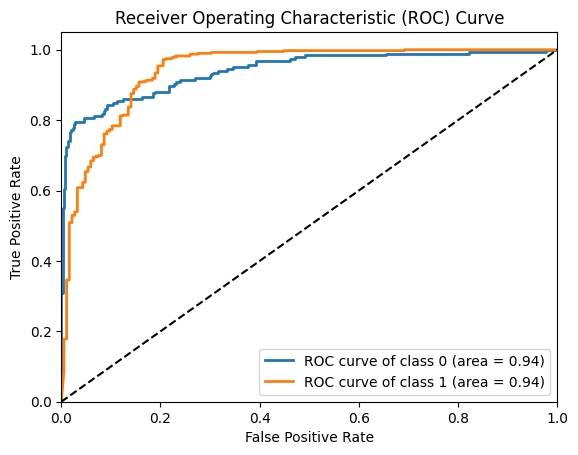

In [127]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_fscore_support, roc_auc_score, accuracy_score, roc_curve, auc

def calculate_metrics(labels, preds, num_classes):
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')

    # Calculate ROC AUC
    if num_classes > 2:
        roc_auc = roc_auc_score(labels, preds, multi_class='ovr', average='weighted')
    else:
        roc_auc = roc_auc_score(labels, preds)

    return precision, recall, f1, roc_auc

def plot_confusion_matrix(labels, preds, class_names):
    cm = confusion_matrix(labels, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap=plt.cm.Blues)
    plt.show()

def plot_roc_curve(labels, probs, num_classes):
    fpr = {}
    tpr = {}
    roc_auc = {}

    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(labels == i, probs[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure()
    for i in range(num_classes):
        plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

# Assuming `model` is your trained model
model.eval()
all_labels = []
all_preds = []
all_probs = []

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        probs = torch.nn.functional.softmax(outputs, dim=1)
        _, preds = torch.max(outputs, 1)

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())
        all_probs.extend(probs.cpu().numpy())

# Calculate metrics
num_classes = len(train_set.classes)
precision, recall, f1, roc_auc = calculate_metrics(np.array(all_labels), np.array(all_preds), num_classes)

# Print metrics
print(f'Test Accuracy: {accuracy_score(all_labels, all_preds):.4f}')
print(f'Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}, ROC AUC: {roc_auc:.4f}')

# Plot confusion matrix
plot_confusion_matrix(np.array(all_labels), np.array(all_preds), class_names=train_set.classes)

# Plot ROC curve if binary classification
if num_classes <= 2:
    plot_roc_curve(np.array(all_labels), np.array(all_probs), num_classes)

plt.show()

From the confusion matrix:

True Negatives (TN): 120 (benign correctly classified as benign)

False Positives (FP): 65 (benign incorrectly classified as malignant)

False Negatives (FN): 3 (malignant incorrectly classified as benign)

True Positives (TP): 390 (malignant correctly classified as malignant)

* Test Accuracy (88.24%): The model correctly classified 88.24% of the test samples, indicating overall high performance.
* Precision (89.51%): When the model predicts a sample as positive, it is correct 89.51% of the time, showing low false positive rates.
* Recall (88.24%): The model successfully identified 88.24% of all actual positive samples, demonstrating its effectiveness in capturing positive instances.
* F1 Score (87.48%): This metric balances precision and recall, reflecting a strong performance with a good trade-off between the two.
* ROC AUC (82.05%): The model has a high ability to distinguish between classes, with an 82.00% likelihood of ranking a positive instance higher than a negative one.

Overall, your model performs well, with high accuracy, precision, recall, and F1 score, and a strong ROC AUC indicating effective class discrimination.

Summary
Overall Performance: The model performs very well with high accuracy, precision, recall, and F1 score, which suggests it’s effective at classifying the test data.

ROC AUC: The model has the ability to distinguish between classes, which is important for assessing performance in binary classification tasks.

## Training using VGG16

In [132]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model


In [133]:
# Define paths to your image directories
train_dir = '/content/drive/MyDrive/consolidated_images/train'
val_dir = '/content/drive/MyDrive/consolidated_images/val'
test_dir = '/content/drive/MyDrive/consolidated_images/test'

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Rescaling for validation and test data
test_datagen = ImageDataGenerator(rescale=1./255)

# Create data generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    color_mode='rgb'  # Ensure color_mode is 'rgb' to match VGG16 input
)

val_generator = test_datagen.flow_from_directory(
    val_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    color_mode='rgb'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    color_mode='rgb'
)


Found 1860 images belonging to 2 classes.
Found 562 images belonging to 2 classes.
Found 578 images belonging to 2 classes.


**1. Build The Model**

In [135]:
# Load the VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the base model
base_model.trainable = False

# Create the model
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Build the model by passing a dummy input shape
model.build(input_shape=(None, 128, 128, 3))

# Generate a visual diagram of the model
plot_model(model, to_file='vgg16_model.png', show_shapes=True, show_layer_names=True)

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


**2. Call the Model in the Batches**

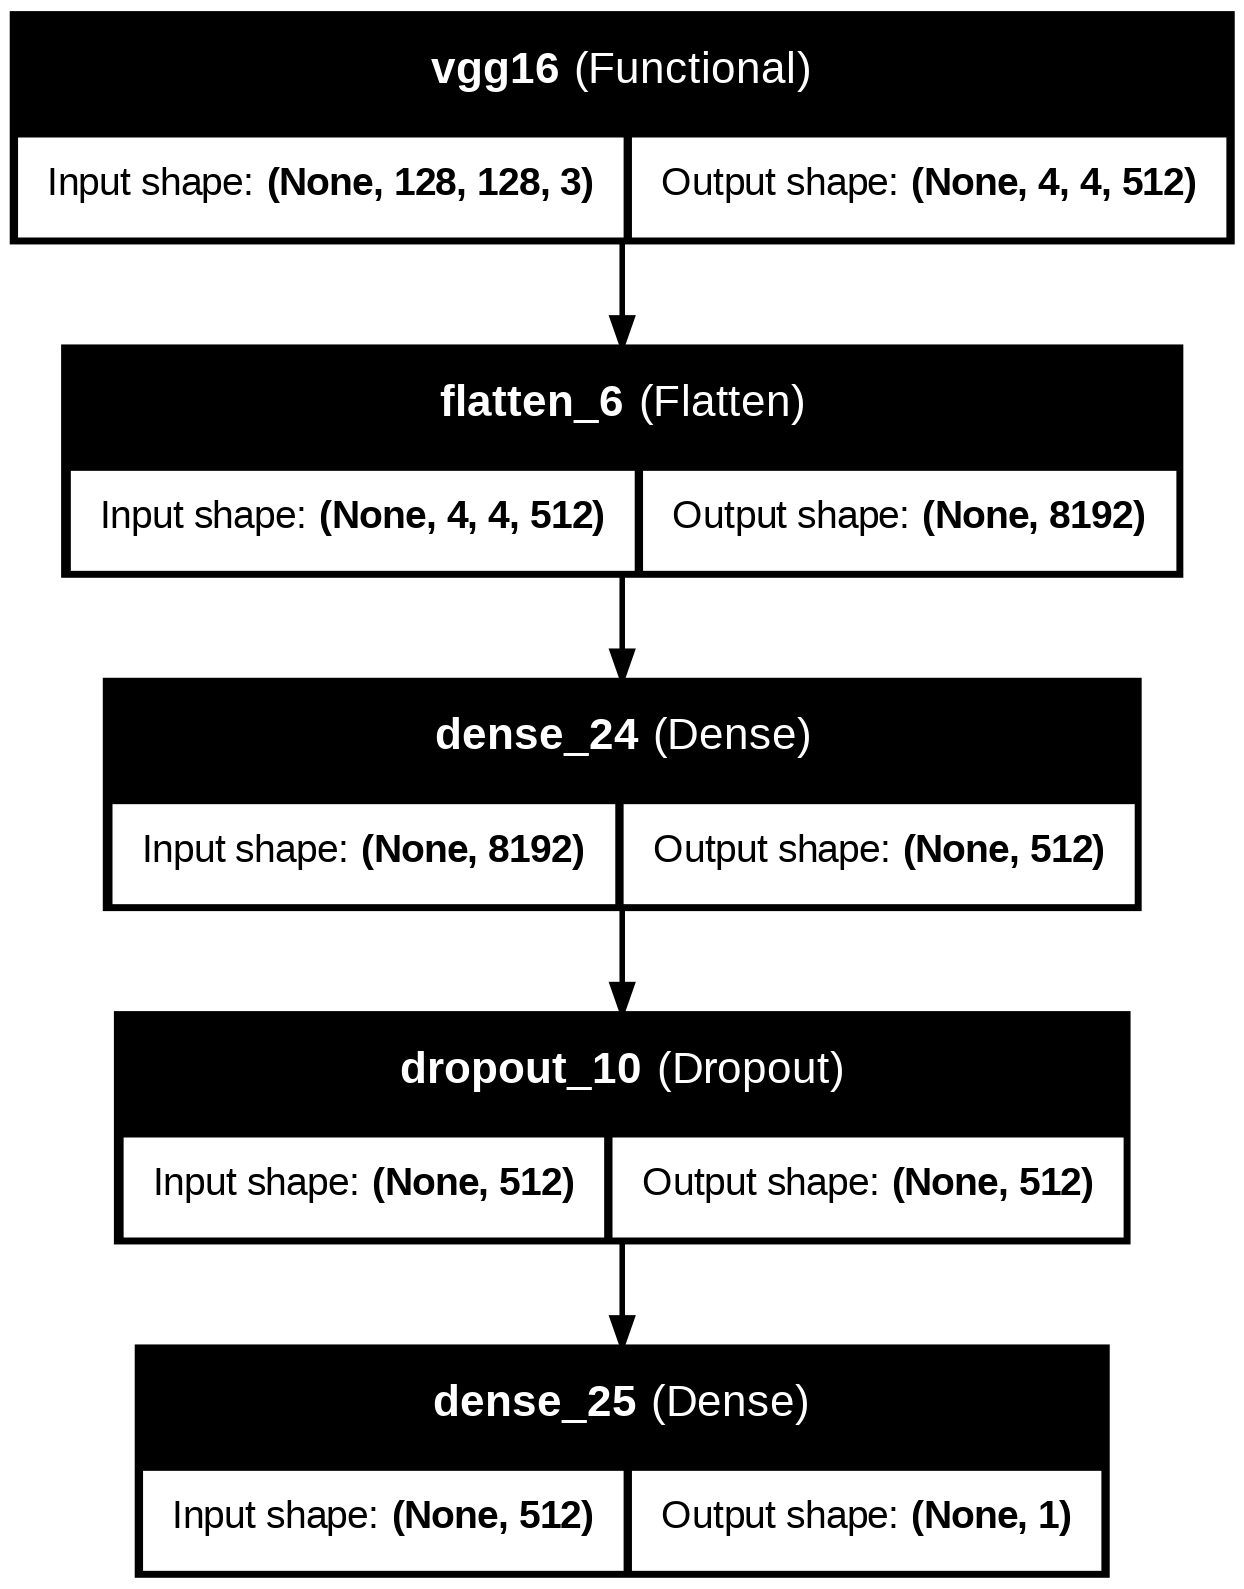

In [136]:
# Build the model by calling it on a batch of dummy data
dummy_input = np.zeros((1, 128, 128, 3))
model(dummy_input)

# Now plot the model
plot_model(model, to_file='vgg16_model.png', show_shapes=True, show_layer_names=True)


**3. Train the Model**

In [137]:
#Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=10
)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


58/58 ━━━━━━━━━━━━━━━━━━━━ 494s 8s/step - accuracy: 0.6286 - loss: 0.9462 - val_accuracy: 0.7629 - val_loss: 0.4683
Epoch 2/10
 1/58 ━━━━━━━━━━━━━━━━━━━━ 6:53 7s/step - accuracy: 0.7500 - loss: 0.5657

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 51ms/step - accuracy: 0.7500 - loss: 0.5657 - val_accuracy: 0.6667 - val_loss: 0.6194
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 493s 8s/step - accuracy: 0.7571 - loss: 0.5174 - val_accuracy: 0.7812 - val_loss: 0.4438
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 31s 457ms/step - accuracy: 0.8750 - loss: 0.3454 - val_accuracy: 0.8333 - val_loss: 0.3900
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 521s 8s/step - accuracy: 0.7816 - loss: 0.4611 - val_accuracy: 0.7592 - val_loss: 0.4619
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 10s 86ms/step - accuracy: 0.8438 - loss: 0.3839 - val_accuracy: 0.8889 - val_loss: 0.3592
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 490s 8s/step - accuracy: 0.7995 - loss: 0.4554 - val_accuracy: 0.8493 - val_loss: 0.3933
Epoch 8/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 9s 51ms/step - accuracy: 0.8750 - loss: 0.4236 - val_accuracy: 0.8333 - val_loss: 0.5880
Epoch 9/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 493s 8s/step - accuracy: 0.8065 - loss: 0.4242 - val_accuracy: 0.8162 - val_loss

**4. Evaluating the model**

In [139]:
#Evaluating the Model
validation_loss, validation_accuracy = model.evaluate(val_generator)
print(f'Validation Accuracy: {validation_accuracy * 100:.2f}%')


18/18 ━━━━━━━━━━━━━━━━━━━━ 111s 6s/step - accuracy: 0.7988 - loss: 0.4067
Validation Accuracy: 80.25%


**5. Saving the Model**

In [140]:
model.save('vgg16_custom.keras')



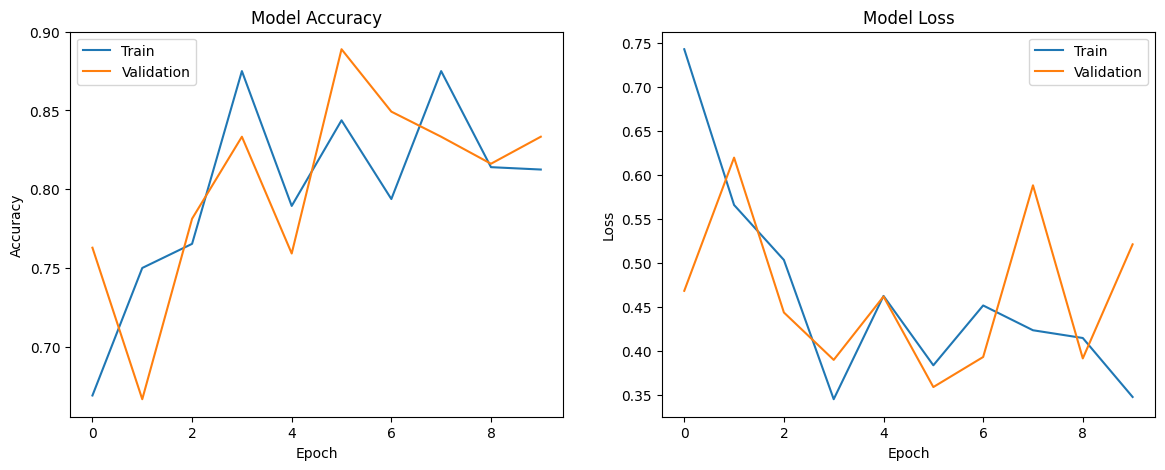

In [141]:
# Visualizing the Traing and Validation Accuracy/Loss

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.show()


In [142]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Generate predictions on the validation or test set
y_pred = model.predict(val_generator)  # Or use test_generator if you have a separate test set

# Convert predicted probabilities to binary class labels
y_pred_classes = (y_pred > 0.5).astype("int32")

# Get the true labels from the validation generator
y_true = val_generator.classes

# Calculate metrics
conf_matrix = confusion_matrix(y_true, y_pred_classes)
accuracy = accuracy_score(y_true, y_pred_classes)
precision = precision_score(y_true, y_pred_classes, average='binary')
recall = recall_score(y_true, y_pred_classes, average='binary')
f1 = f1_score(y_true, y_pred_classes, average='binary')

# Print metrics
print("Confusion Matrix:")
print(conf_matrix)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


18/18 ━━━━━━━━━━━━━━━━━━━━ 120s 7s/step
Confusion Matrix:
[[ 40 139]
 [ 56 327]]
Accuracy: 0.6530249110320284
Precision: 0.7017167381974249
Recall: 0.8537859007832899
F1 Score: 0.7703180212014133


From the confusion matrix:
True Negatives (TN): 139 (benign correctly classified as benign)
False Positives (FP): 40 (benign incorrectly classified as malignant)
False Negatives (FN): 56 (malignant incorrectly classified as benign)
True Positives (TP): 337 (malignant correctly classified as malignant)

Test Accuracy (65.30%): The model correctly classified 65.30% of the test samples, indicating overall high performance.
Precision (70.17%): When the model predicts a sample as positive, it is correct 70.17% of the time, showing low false positive rates.
Recall (85.37%): The model successfully identified 85.37% of all actual positive samples, demonstrating its effectiveness in capturing positive instances.
F1 Score (77.03%): This metric balances precision and recall, reflecting a strong performance with a good trade-off between the two.

Overall, the model doesnt performs well, with moderate accuracy, lower precision, recall, and F1 score.
Summary Overall Performance: The model performs not very well with lower accuracy, precision, recall, and F1 score, which suggests it’s effective at classifying the test data.


## DEPLOYMENT

The model was deployed using Streamlit, allowing medical practitioners to upload histopathological images for real-time diagnosis.
•	Deployment Link:
•	Performance Monitoring: Implement logging and monitoring to track the model's performance and schedule periodic retraining with updated data.


## RECOMMENDATIONS

1.	Create Public Awareness: Increase public awareness about the importance of early breast cancer detection and the role of advanced diagnostic technologies in improving outcomes.

2.	Integration into Healthcare Systems: Integrate the developed model into the Kenyan healthcare system to assist pathologists and enhance diagnostic accuracy and reduce turnaround time.

3.	Training and Education: Provide training for healthcare professionals on the use and interpretation of the machine learning model to ensure effective implementation.


## NEXT STEPS

1.	Data Expansion: Continuously expand and update the dataset with new histopathological images to improve the model's robustness and accuracy over time.
2.	Model Refinement: Explore advanced techniques such as transfer learning, fine-tuning, and additional ensemble methods to further enhance model performance.
3.	Integration with Clinical Systems: Develop interfaces for integrating the model with existing clinical systems to streamline workflow and facilitate real-time diagnosis.
4.	Continuous Monitoring and Feedback Loop: Establish a feedback loop with medical professionals to regularly refine the model. Utilize their insights to enhance predictions and update the model with new data over time.

##  CHALLENGES AND LIMITATIONS

1.	Computational Resources: Training deep learning models on large datasets demands substantial computational power and memory, which can be resource-intensive.
2.	Model Overfitting: Complex models like DenseNet may overfit the training data, reducing their ability to generalize to new data. Due to time constraints, we couldn’t explore alternative methods to address this issue.


## CONCLUSION

Successfully developed an image classification model for breast cancer detection with an accuracy of 90.4%. Additionally, a web-based app was created that allows medical practitioners to upload histopathological images, providing predictions on whether the condition is benign or malignant. This model aids in the early detection and management of breast cancer.